Sliding Window Analysis

In [7]:
# Import Modules

import sys
sys.path.append("..")
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
from scipy.io import loadmat
import scipy
from scipy.stats import ttest_ind, skew, ttest_rel
import Actigraph_Metrics
from pygt3x.reader import FileReader 

In [3]:
def MAD_boxplot(sbs, x_mag, window_size=100, show_outlier=True):
    # Accelerometry is at 100 Hz, so window_size = 100 means 1 second
    
    # Output Boxplot for each SBS Score
    sbs_mad_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}
    sbs_skew_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}
    sbs_stdev_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}
    sbs_mean_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}


    # Populate the dictionary with MAD values
    for i, sbs_value in enumerate(sbs):    
        signal = Actigraph_Metrics.VecMag_MAD(x_mag[i,:], window_size)
        sbs_mad_dict[sbs_value].extend(signal)
        sbs_skew_dict[sbs_value].append(skew(signal, axis = 0, bias = True))
        sbs_stdev_dict[sbs_value].append(np.std(signal))
        sbs_mean_dict[sbs_value].append(np.mean(signal))
        
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

    # Box plot: this version will show the outliers too
    ax[0,0].boxplot([sbs_mad_dict[-3], sbs_mad_dict[-2], sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    ax[0,1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    ax[1,0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    ax[1,1].boxplot([sbs_mean_dict[-3], sbs_mean_dict[-2], sbs_mean_dict[-1], sbs_mean_dict[0], sbs_mean_dict[1], sbs_mean_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    #label axes
    ax[0,0].set_xlabel('SBS Score', fontsize = 8)
    ax[0,0].set_ylabel('MAD', fontsize = 8)
    ax[0,1].set_xlabel('SBS Score', fontsize = 8)
    ax[0,1].set_ylabel('Skew', fontsize = 8)
    ax[1,0].set_xlabel('SBS Score', fontsize = 8)
    ax[1,0].set_ylabel('Mean', fontsize = 8)
    ax[1,1].set_xlabel('SBS Score', fontsize = 8)
    ax[1,1].set_ylabel('Standard Deviation', fontsize = 8)
    
    # T-test Comparisons
    # -2 and 2
    # t_stat_mad, p_value_mad = ttest_ind(sbs_mad_dict[2], sbs_mad_dict[-2], equal_var=False)

    # print("T-test for MAD values:")
    # print("T-statistic:", t_stat_mad)
    # print("P-value:", p_value_mad)

        # T-test Comparisons
    sbs_values = [-2, -1, 0, 1, 2]
    for i in range(len(sbs_values)):
        for j in range(i + 1, len(sbs_values)):
            sbs_i = sbs_values[i]
            sbs_j = sbs_values[j]
            if sbs_mad_dict[sbs_i] and sbs_mad_dict[sbs_j]:
                t_stat_mad, p_value_mad = ttest_ind(sbs_mad_dict[sbs_i], sbs_mad_dict[sbs_j], equal_var=False)
                print(f"T-test for MAD values between SBS Score {sbs_i} and {sbs_j}:")
                print(f"T-statistic: {t_stat_mad}")
                print(f"P-value: {p_value_mad}")
                print()

    return ax, sbs_mad_dict, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict

def vitals_boxplot(sbs, vitals_signal, window_size=100, show_outlier=True):
    # Output Boxplot for each SBS Score
    sbs_skew_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}
    sbs_stdev_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}
    sbs_mean_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}


    # Populate the dictionary with MAD values
    for i, sbs_value in enumerate(sbs):    
        signal = vitals_signal[i]
        if np.mean(signal) !=0:
            sbs_skew_dict[sbs_value].append(skew(signal))
            sbs_stdev_dict[sbs_value].append(np.std(signal))
            sbs_mean_dict[sbs_value].append(np.mean(signal))
        else:
            print(f'not enough data at sbs index {i}, flag_list detected') #flag list was detected here. Note: If you go into matlab to cross-check, be aware matlab indices start at 1
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
    
    #Drop NaN Values
    sbs_skew_dict = {key: [x for x in value if not np.isnan(x)] for key, value in sbs_skew_dict.items()}
    sbs_stdev_dict = {key: [x for x in value if not np.isnan(x)] for key, value in sbs_stdev_dict.items()}
    sbs_mean_dict = {key: [x for x in value if not np.isnan(x)] for key, value in sbs_mean_dict.items()}
    
    # Box plot: this version will show the outliers too
    ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    ax[2].boxplot([sbs_mean_dict[-3], sbs_mean_dict[-2], sbs_mean_dict[-1], sbs_mean_dict[0], sbs_mean_dict[1], sbs_mean_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)

    #label axes
    ax[0].set_xlabel('SBS Score', fontsize = 10)
    ax[0].set_ylabel('Stdev', fontsize = 10)
    ax[2].set_xlabel('SBS Score', fontsize = 10)
    ax[2].set_ylabel('Mean', fontsize = 10)
    ax[1].set_xlabel('SBS Score', fontsize = 10)
    ax[1].set_ylabel('Skew', fontsize = 10)

    # T-test
    sbs_values = [-3, -2, -1, 0, 1, 2]
    for i in range(len(sbs_values)):
        for j in range(i + 1, len(sbs_values)):
            sbs_i = sbs_values[i]
            sbs_j = sbs_values[j]
            if sbs_mean_dict[sbs_i] and sbs_mean_dict[sbs_j]:
                t_stat_mean, p_value_mean = ttest_ind(sbs_mean_dict[sbs_i], sbs_mean_dict[sbs_j], equal_var=False)
                t_stat_stdev, p_value_stdev = ttest_ind(sbs_stdev_dict[sbs_i], sbs_stdev_dict[sbs_j], equal_var=False)
                print(f"T-test for mean values between SBS Score {sbs_i} and {sbs_j}:")
                print(f"T-statistic: {t_stat_mean}")
                print(f"P-value: {p_value_mean}")
                print(f"T-test for standard deviation values between SBS Score {sbs_i} and {sbs_j}:")
                print(f"T-statistic: {t_stat_stdev}")
                print(f"P-value: {p_value_stdev}")
                print()
    return ax, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict

def report_quartiles(sbs_mad_dict):
    # print quartiles and 90th percentile
    quartiles = {}
    for sbs_value, mad_list in sbs_mad_dict.items():
        quartiles[sbs_value] = {
            'Q1': np.percentile(mad_list, 25),
            'Q2': np.percentile(mad_list, 50),
            'Q3': np.percentile(mad_list, 75),
            '90th Percentile': np.percentile(mad_list, 90)
        }

    # Print quartiles and 90th percentile
    for sbs_value, values in quartiles.items():
        print(f"SBS Score: {sbs_value}")
        print(f"Q1: {values['Q1']}")
        print(f"Q2 (Median): {values['Q2']}")
        print(f"Q3: {values['Q3']}")
        print(f"90th Percentile: {values['90th Percentile']}")
        print()

In [4]:
# data_dir = r'S:\Sedation_monitoring\PedAccel_directory\PedAccel\data_analysis\PythonPipeline\PatientData'
# data_dir = r'C:\Users\jakes\Documents\DT 6 Analysis\PythonCode\PedAccel\data_analysis\PythonPipeline\PatientData'
data_dir = r'/Users/sidharthraghavan/Library/CloudStorage/OneDrive-Personal/Sid_stuff/PROJECTS/PedAccel/data_analysis/Vitals_accel_analysis/PatientData'
window_size = 100 #100 is 1 second worth of time
lead_time = 10
slice_size_min = 11
sr = .5

In [8]:
def load_gt3x_data(gt3x_filepath, to_numpy=False, verbose=False):
    '''
    Load data from GT3X file
    Expect data to have 3 columns (X, Y, Z) and a timestamp index
    '''
    with FileReader(gt3x_filepath) as reader:
        df = reader.to_pandas()
        df.reset_index(inplace=True)
        col_names = df.columns.values.tolist()
    if verbose:
        print(df.head())
        print(col_names)    
    if to_numpy:
        array = df.to_numpy()
        if verbose:
            print(array.shape)
        return array, col_names

    return df, col_names

Processing patient: Patient9


/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,0].boxplot([sbs_mad_dict[-3], sbs_mad_dict[-2], sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropp

T-test for MAD values between SBS Score -2 and -1:
T-statistic: 13.422446850538671
P-value: 6.039252218310628e-41

T-test for MAD values between SBS Score -2 and 0:
T-statistic: 17.964938451230136
P-value: 9.65514963700047e-72

T-test for MAD values between SBS Score -2 and 1:
T-statistic: 3.8517043220832137
P-value: 0.00012183528720407105

T-test for MAD values between SBS Score -1 and 0:
T-statistic: 16.820222881376644
P-value: 1.9834483842041457e-63

T-test for MAD values between SBS Score -1 and 1:
T-statistic: -0.5282347746440997
P-value: 0.5974244683359624

T-test for MAD values between SBS Score 0 and 1:
T-statistic: -2.0655947149335274
P-value: 0.03906019355276042



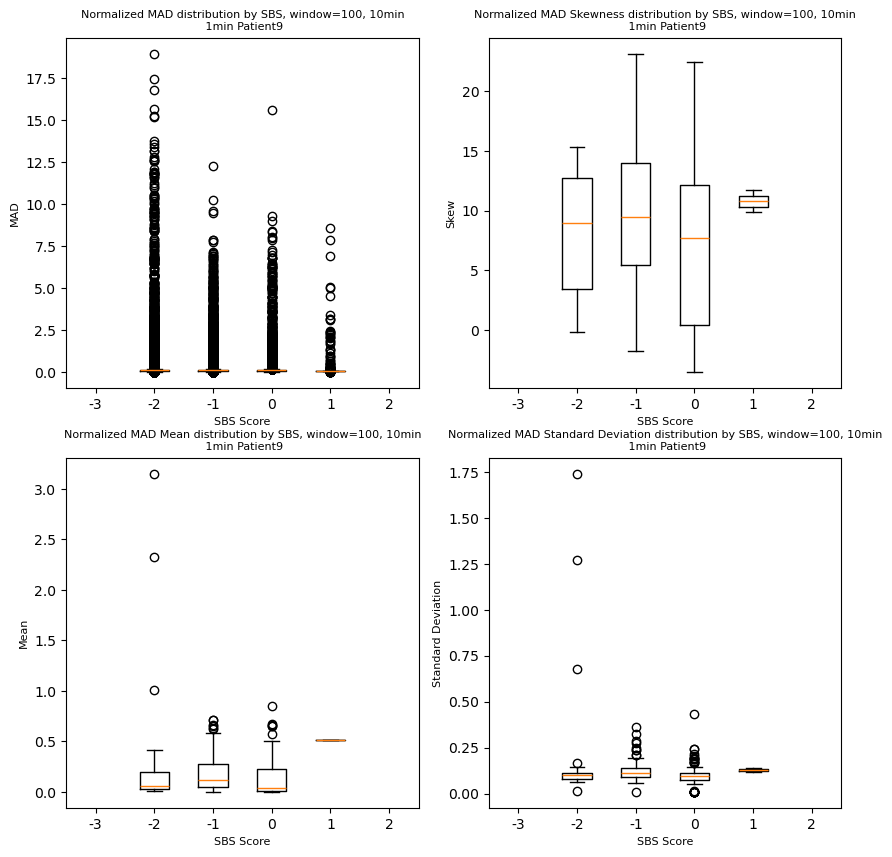

length of signal window for BoxPlot function: 268
T-test for mean values between SBS Score -2 and -1:
T-statistic: -1.2695304497877082
P-value: 0.21025944791200302
T-test for standard deviation values between SBS Score -2 and -1:
T-statistic: -0.42914960202176744
P-value: 0.6692654006772272

T-test for mean values between SBS Score -2 and 0:
T-statistic: -1.619703254001748
P-value: 0.11214243381177527
T-test for standard deviation values between SBS Score -2 and 0:
T-statistic: 0.674878268796681
P-value: 0.5019690301919743

T-test for mean values between SBS Score -2 and 1:
T-statistic: -1.3240054012483224
P-value: 0.3586164864880816
T-test for standard deviation values between SBS Score -2 and 1:
T-statistic: 3.3515760881666257
P-value: 0.01252596389147611

T-test for mean values between SBS Score -1 and 0:
T-statistic: -0.6685264126362798
P-value: 0.5044857887938141
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: 1.4985572307090769
P-value: 0.13541860213

/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stde

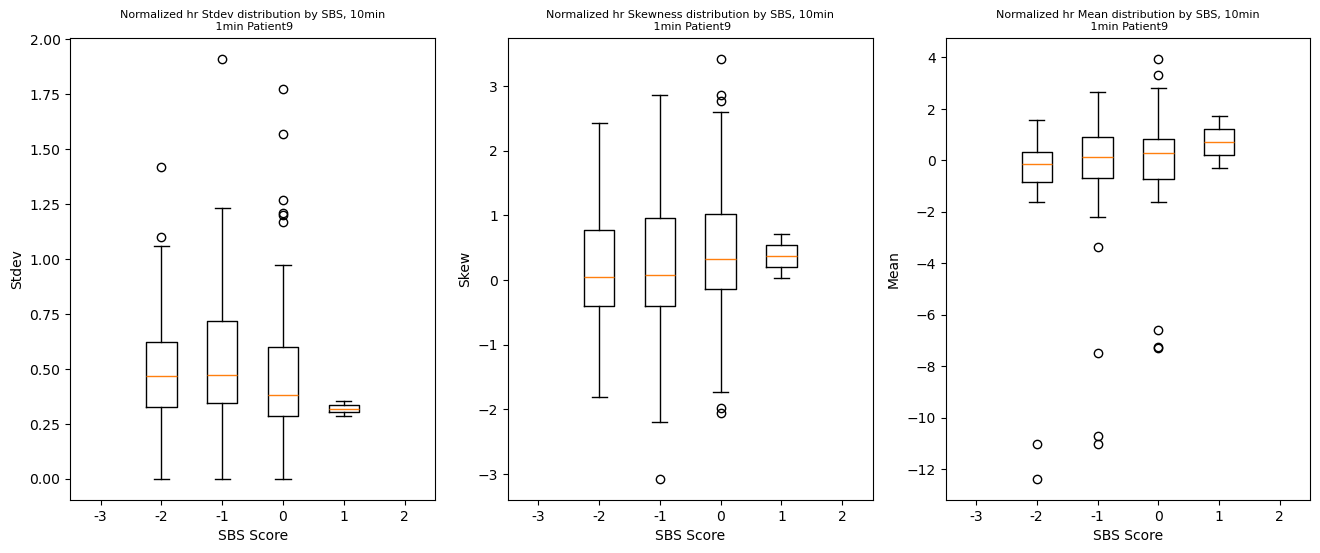

length of signal window for BoxPlot function: 268
T-test for mean values between SBS Score -2 and -1:
T-statistic: -1.4356819821947922
P-value: 0.15705630183290467
T-test for standard deviation values between SBS Score -2 and -1:
T-statistic: -1.9320971461150533
P-value: 0.056319466482345315

T-test for mean values between SBS Score -2 and 0:
T-statistic: -1.4268176162895498
P-value: 0.1587190904508446
T-test for standard deviation values between SBS Score -2 and 0:
T-statistic: -1.1563403359361009
P-value: 0.25040368407828717

T-test for mean values between SBS Score -2 and 1:
T-statistic: -2.155834064809972
P-value: 0.061116183117444024
T-test for standard deviation values between SBS Score -2 and 1:
T-statistic: -2.298909255132129
P-value: 0.13239126242897187

T-test for mean values between SBS Score -1 and 0:
T-statistic: -0.08630499601072229
P-value: 0.9313057796137731
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: 0.821226887472889
P-value: 0.412386

/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stde

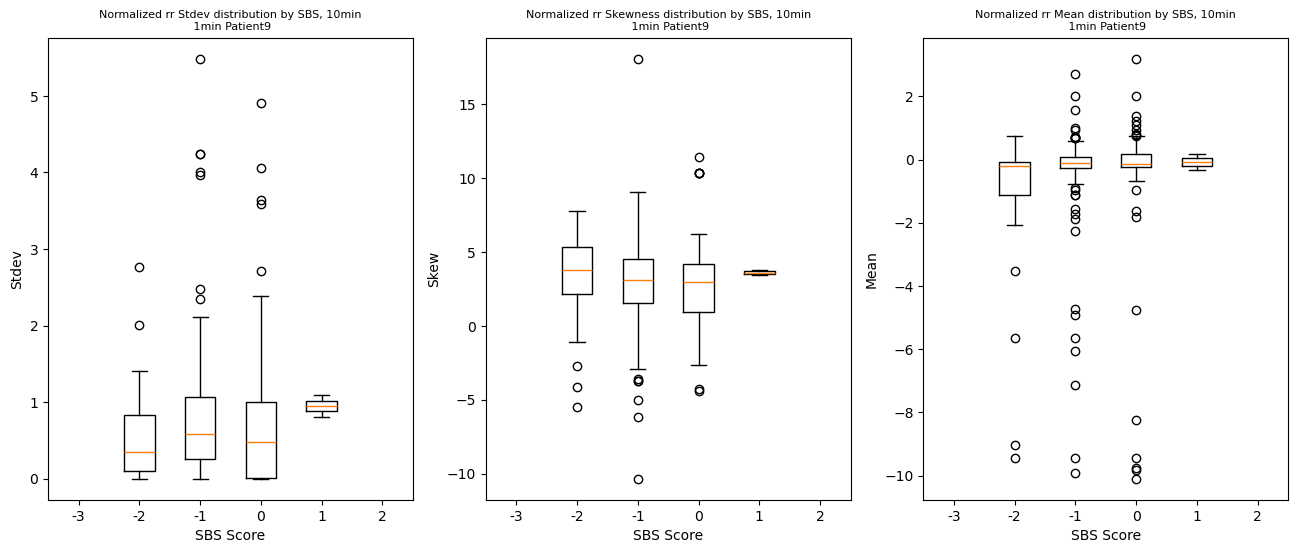

length of signal window for BoxPlot function: 268
T-test for mean values between SBS Score -2 and -1:
T-statistic: -0.014225700250913367
P-value: 0.9886981721409459
T-test for standard deviation values between SBS Score -2 and -1:
T-statistic: 0.3802866916125116
P-value: 0.7051217644456214

T-test for mean values between SBS Score -2 and 0:
T-statistic: -0.22773262352276327
P-value: 0.8206209060538991
T-test for standard deviation values between SBS Score -2 and 0:
T-statistic: 1.108297675507468
P-value: 0.2721672447144475

T-test for mean values between SBS Score -2 and 1:
T-statistic: -0.8821189727510016
P-value: 0.3833818694295352
T-test for standard deviation values between SBS Score -2 and 1:
T-statistic: -0.28734648569952165
P-value: 0.8198871996685113

T-test for mean values between SBS Score -1 and 0:
T-statistic: -0.32163107635906985
P-value: 0.7480317683587929
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: 1.114530475011337
P-value: 0.2662446429

/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stde

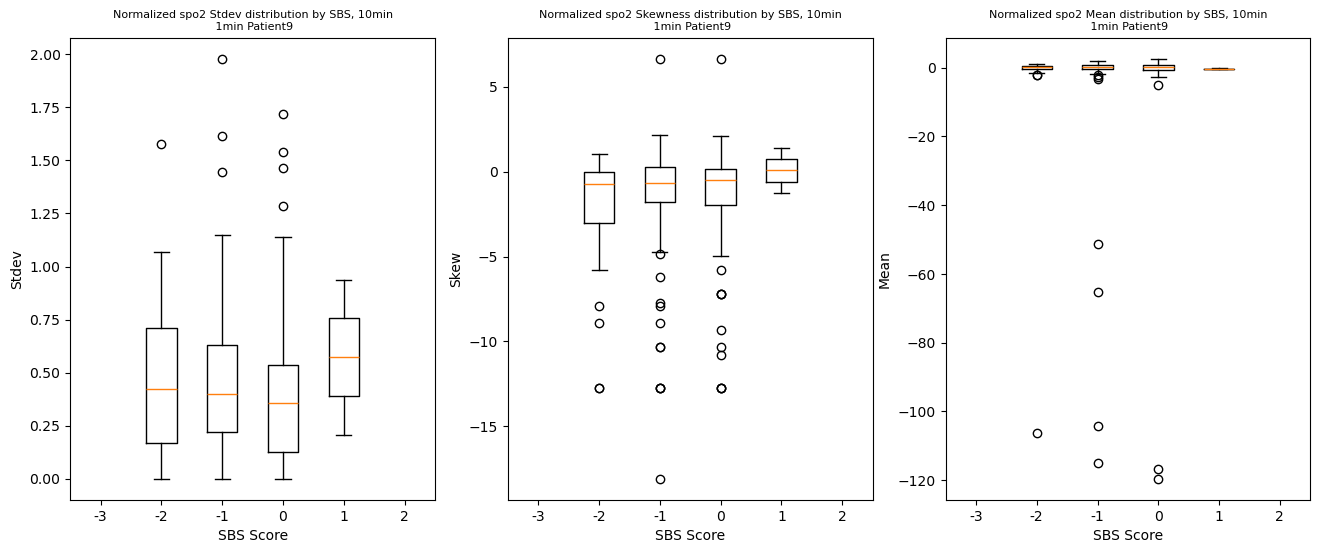

length of signal window for BoxPlot function: 268
T-test for mean values between SBS Score -2 and -1:
T-statistic: -0.08773397696064042
P-value: 0.9303945935978216
T-test for standard deviation values between SBS Score -2 and -1:
T-statistic: 1.4761995112639668
P-value: 0.14792456559934314

T-test for mean values between SBS Score -2 and 0:
T-statistic: 0.031791060618082866
P-value: 0.9747415918167277
T-test for standard deviation values between SBS Score -2 and 0:
T-statistic: 1.7053700150580884
P-value: 0.09650882838234096

T-test for mean values between SBS Score -2 and 1:
T-statistic: 2.7894228531574337
P-value: 0.05920677954281735
T-test for standard deviation values between SBS Score -2 and 1:
T-statistic: 1.7053700150580955
P-value: 0.09650882838233958

T-test for mean values between SBS Score -1 and 0:
T-statistic: 0.17897840457505726
P-value: 0.8581181833288082
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: 1.2893977805561758
P-value: 0.199781515

/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stde

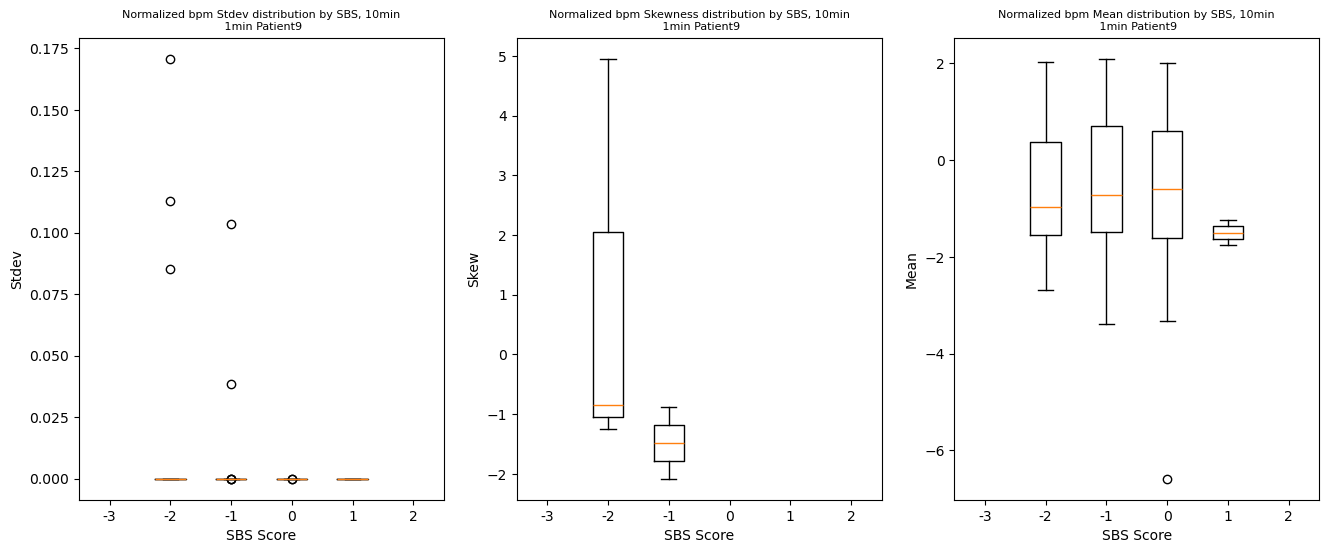

length of signal window for BoxPlot function: 268
T-test for mean values between SBS Score -2 and -1:
T-statistic: 0.24101159128192776
P-value: 0.8103955162025046
T-test for standard deviation values between SBS Score -2 and -1:
T-statistic: 0.7428479895115109
P-value: 0.4612924855514434

T-test for mean values between SBS Score -2 and 0:
T-statistic: 0.6503669571363122
P-value: 0.5180873683307925
T-test for standard deviation values between SBS Score -2 and 0:
T-statistic: 1.345228713834642
P-value: 0.18673876430993638

T-test for mean values between SBS Score -2 and 1:
T-statistic: 2.191299061416761
P-value: 0.18978129144979192
T-test for standard deviation values between SBS Score -2 and 1:
T-statistic: 1.3452287138347034
P-value: 0.18673876430991665

T-test for mean values between SBS Score -1 and 0:
T-statistic: 0.6345565778314277
P-value: 0.5263595775620197
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: 1.5650928110773257
P-value: 0.1202390666774727

/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stde

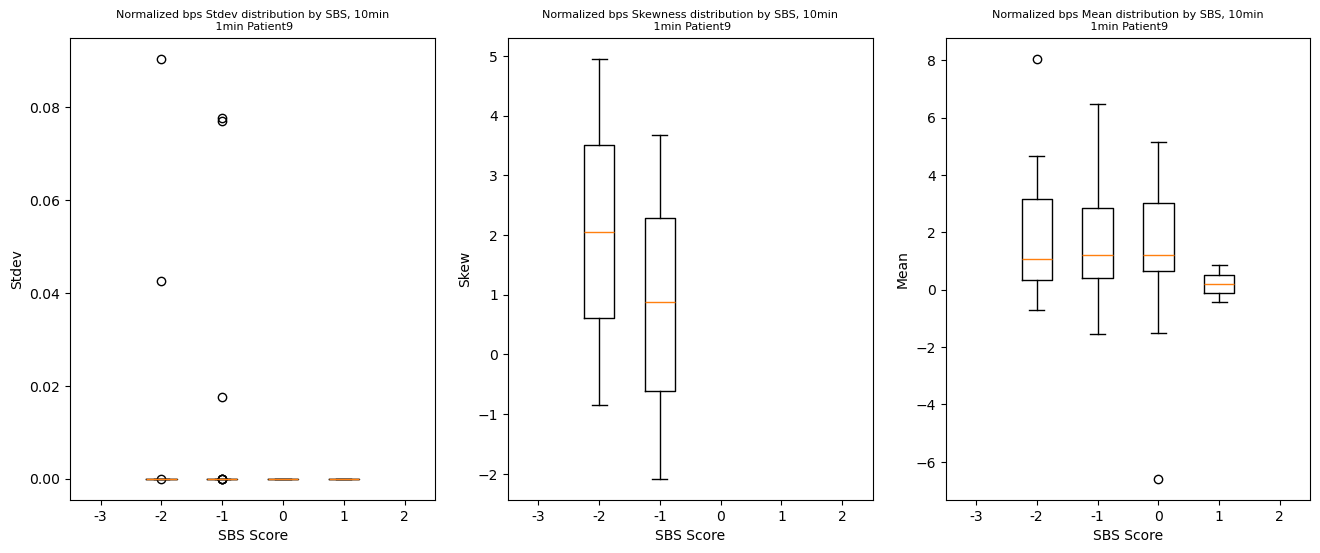

length of signal window for BoxPlot function: 268
T-test for mean values between SBS Score -2 and -1:
T-statistic: -0.3797337098377809
P-value: 0.7057054256298385
T-test for standard deviation values between SBS Score -2 and -1:
T-statistic: 1.4547924533526038
P-value: 0.1537952251108399

T-test for mean values between SBS Score -2 and 0:
T-statistic: -0.38634447037634645
P-value: 0.7007540386246499
T-test for standard deviation values between SBS Score -2 and 0:
T-statistic: 1.6981200594454602
P-value: 0.09788138819203314

T-test for mean values between SBS Score -2 and 1:
T-statistic: 1.9540458670251208
P-value: 0.05808493005271135
T-test for standard deviation values between SBS Score -2 and 1:
T-statistic: 1.6981200594454615
P-value: 0.09788138819203285

T-test for mean values between SBS Score -1 and 0:
T-statistic: -0.020843083653293012
P-value: 0.9833895275293488
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: 1.514193110385373
P-value: 0.1326508666

/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stde

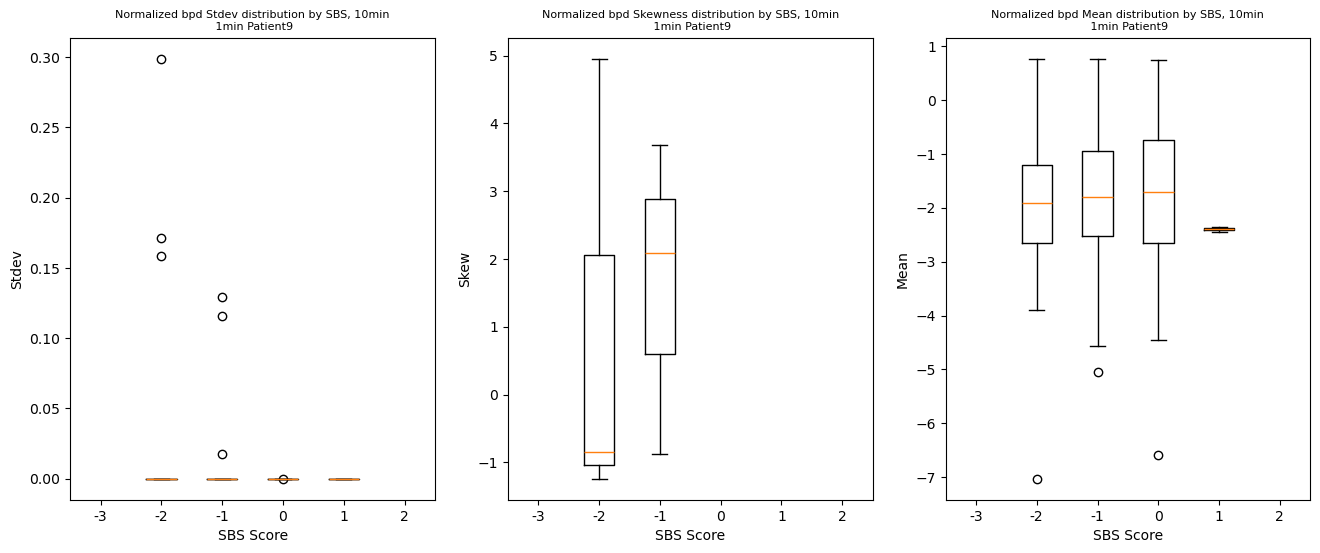

Processing patient: Patient11
T-test for MAD values between SBS Score -2 and -1:
T-statistic: 17.554563861809
P-value: 6.580549045136814e-69

T-test for MAD values between SBS Score -2 and 0:
T-statistic: 13.832676444886657
P-value: 1.73572385657266e-43

T-test for MAD values between SBS Score -2 and 1:
T-statistic: 1.0955956336433406
P-value: 0.27365282650144646

T-test for MAD values between SBS Score -1 and 0:
T-statistic: -4.272266363559781
P-value: 1.936364684338072e-05

T-test for MAD values between SBS Score -1 and 1:
T-statistic: -0.32098387542834317
P-value: 0.7483238616579024

T-test for MAD values between SBS Score 0 and 1:
T-statistic: -0.017806058948909638
P-value: 0.9857989337529409



/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,0].boxplot([sbs_mad_dict[-3], sbs_mad_dict[-2], sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropp

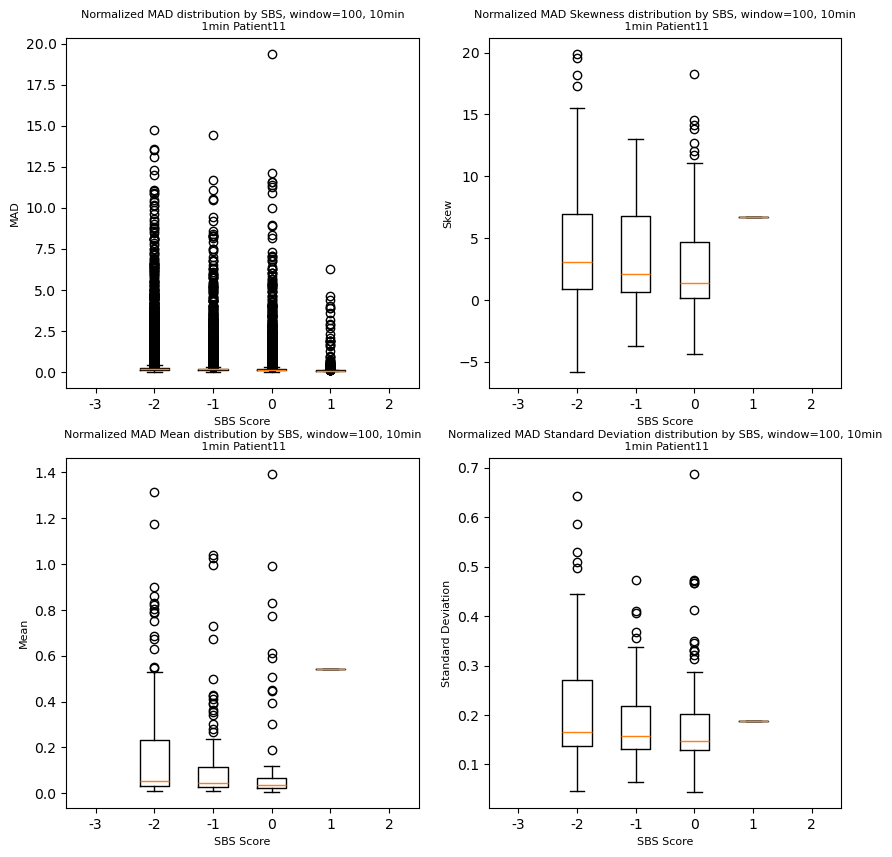

length of signal window for BoxPlot function: 303
T-test for mean values between SBS Score -2 and -1:
T-statistic: -0.940793440184348
P-value: 0.34794033875874053
T-test for standard deviation values between SBS Score -2 and -1:
T-statistic: 0.9506991364688143
P-value: 0.3429004642755662

T-test for mean values between SBS Score -2 and 0:
T-statistic: -1.1563848536458345
P-value: 0.24905138875219415
T-test for standard deviation values between SBS Score -2 and 0:
T-statistic: 0.8392587955645258
P-value: 0.40230253412324724

T-test for mean values between SBS Score -2 and 1:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score -2 and 1:
T-statistic: nan
P-value: nan

T-test for mean values between SBS Score -1 and 0:
T-statistic: -0.11778120969085838
P-value: 0.9063768696057581
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -0.0629199444972967
P-value: 0.9498968302865602

T-test for mean values between SBS Score -1 and 1:
T-

/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stde

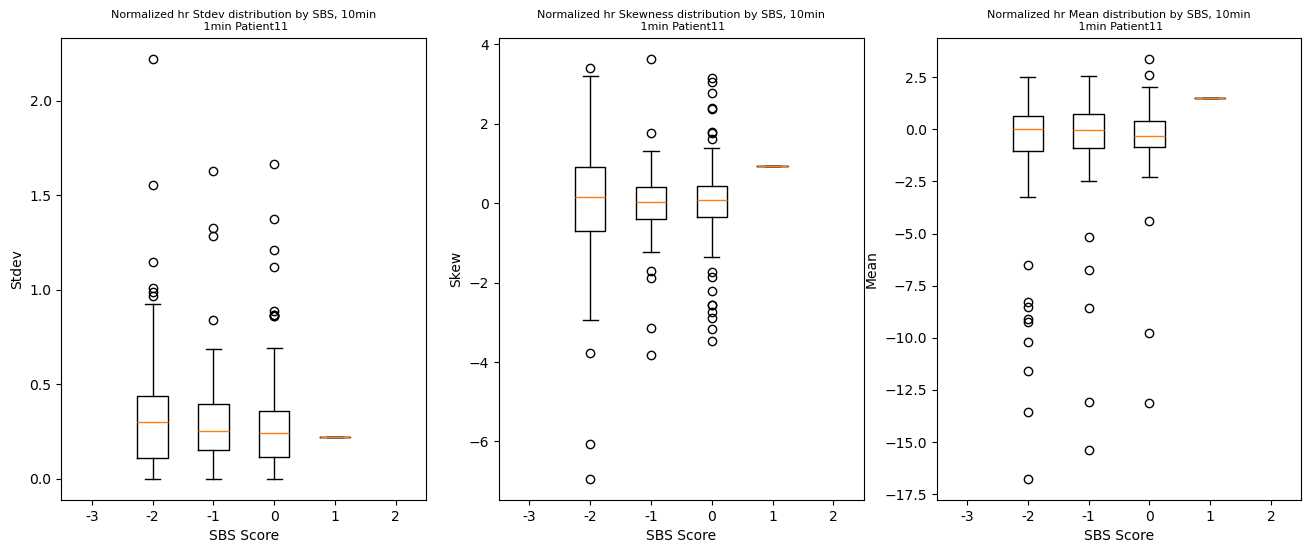

length of signal window for BoxPlot function: 303


/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stde

T-test for mean values between SBS Score -2 and -1:
T-statistic: -0.8688327111296545
P-value: 0.3881588790986942
T-test for standard deviation values between SBS Score -2 and -1:
T-statistic: -0.509963430472778
P-value: 0.6119466879682457

T-test for mean values between SBS Score -2 and 0:
T-statistic: -2.605700562111082
P-value: 0.011278790138227976
T-test for standard deviation values between SBS Score -2 and 0:
T-statistic: -0.8637432490294765
P-value: 0.39024880729967815

T-test for mean values between SBS Score -2 and 1:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score -2 and 1:
T-statistic: nan
P-value: nan

T-test for mean values between SBS Score -1 and 0:
T-statistic: -1.7610200019422397
P-value: 0.08417099906086929
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -0.32774300532194967
P-value: 0.7441878501621657

T-test for mean values between SBS Score -1 and 1:
T-statistic: nan
P-value: nan
T-test for standard 

/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sbs_mean_dict[-3], sbs_mean_dict[-2], sbs_mean_dict[-1], sbs_mean_dict[0], sbs_mean_dict[1], sbs_mean_dict[2]],
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


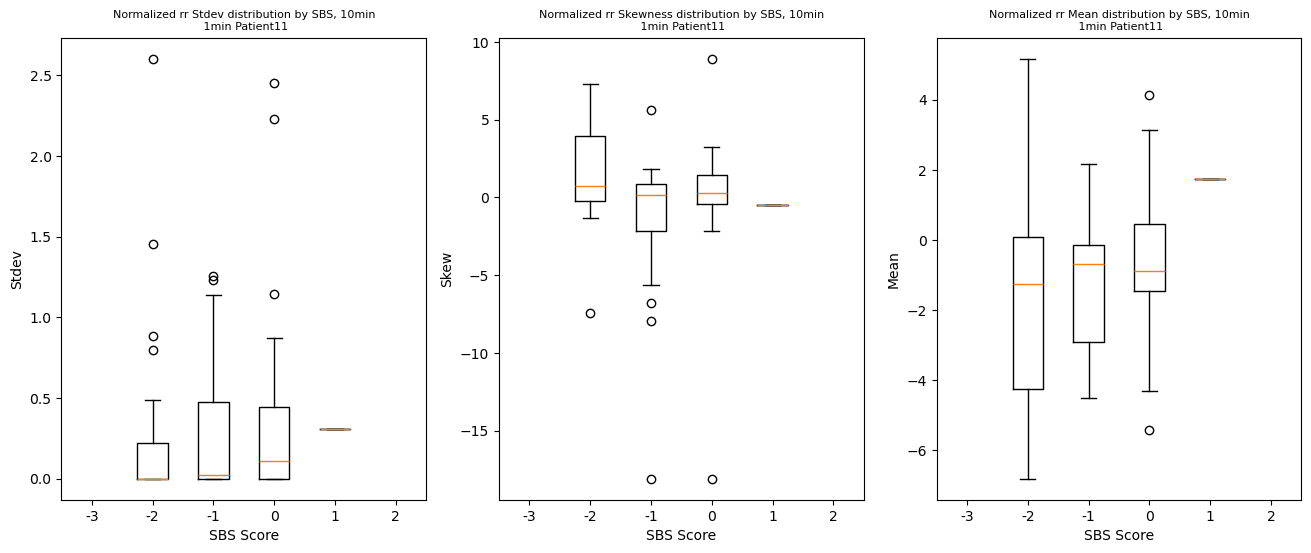

length of signal window for BoxPlot function: 303
T-test for mean values between SBS Score -2 and -1:
T-statistic: -1.2594092168818976
P-value: 0.21040435782250297
T-test for standard deviation values between SBS Score -2 and -1:
T-statistic: 1.2125703179867446
P-value: 0.22682299869022984

T-test for mean values between SBS Score -2 and 0:
T-statistic: -1.6153666911958413
P-value: 0.10913830300574767
T-test for standard deviation values between SBS Score -2 and 0:
T-statistic: 1.1522947856338768
P-value: 0.2506498738551721

T-test for mean values between SBS Score -2 and 1:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score -2 and 1:
T-statistic: nan
P-value: nan

T-test for mean values between SBS Score -1 and 0:
T-statistic: -1.6580288095626312
P-value: 0.10035504118780747
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -0.06694385674592138
P-value: 0.9466964214462312

T-test for mean values between SBS Score -1 and 1:


/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stde

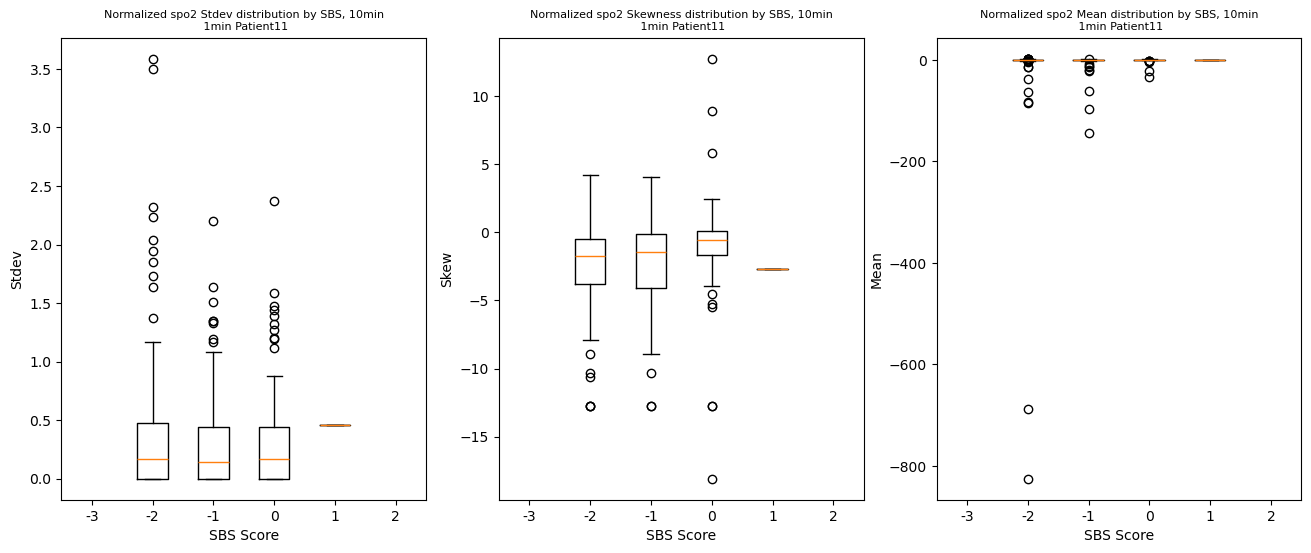

length of signal window for BoxPlot function: 303
T-test for mean values between SBS Score -2 and -1:
T-statistic: 1.3663994117309584
P-value: 0.17484929991228004
T-test for standard deviation values between SBS Score -2 and -1:
T-statistic: -1.5395409072527093
P-value: 0.12682806086561893

T-test for mean values between SBS Score -2 and 0:
T-statistic: 4.585375377145944
P-value: 9.877599685719931e-06
T-test for standard deviation values between SBS Score -2 and 0:
T-statistic: -3.4514008526502375
P-value: 0.0007306489848983844

T-test for mean values between SBS Score -2 and 1:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score -2 and 1:
T-statistic: nan
P-value: nan



/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stde

T-test for mean values between SBS Score -1 and 0:
T-statistic: 0.5746495692955514
P-value: 0.5665817604817087
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: 0.18707553745536673
P-value: 0.8519252461000283

T-test for mean values between SBS Score -1 and 1:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score -1 and 1:
T-statistic: nan
P-value: nan

T-test for mean values between SBS Score 0 and 1:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score 0 and 1:
T-statistic: nan
P-value: nan



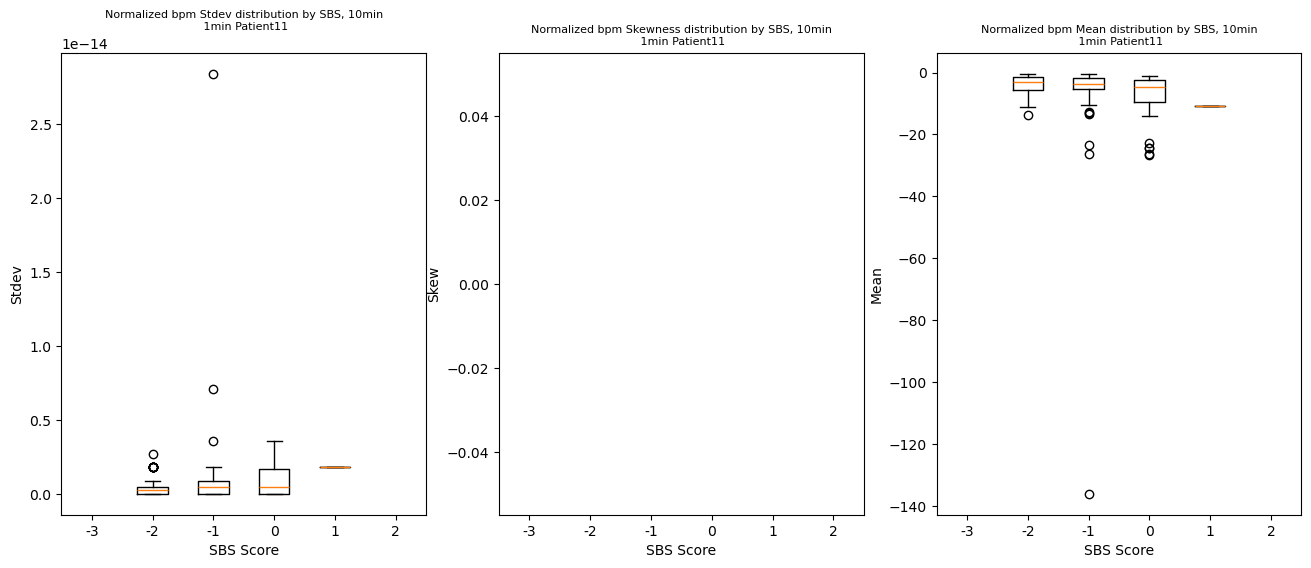

length of signal window for BoxPlot function: 303
T-test for mean values between SBS Score -2 and -1:
T-statistic: 1.30076559735897
P-value: 0.19624831656354697
T-test for standard deviation values between SBS Score -2 and -1:
T-statistic: -1.128608775946968
P-value: 0.2617969857925896

T-test for mean values between SBS Score -2 and 0:
T-statistic: 4.4072465591397245
P-value: 2.0434367655514426e-05
T-test for standard deviation values between SBS Score -2 and 0:
T-statistic: -3.2511788978709855
P-value: 0.0014532590756712548

T-test for mean values between SBS Score -2 and 1:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score -2 and 1:
T-statistic: nan
P-value: nan

T-test for mean values between SBS Score -1 and 0:
T-statistic: 0.7422472690298714
P-value: 0.45929220019312467
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -0.12558321243391254
P-value: 0.9002757893344581

T-test for mean values between SBS Score -1 and 1:

/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stde

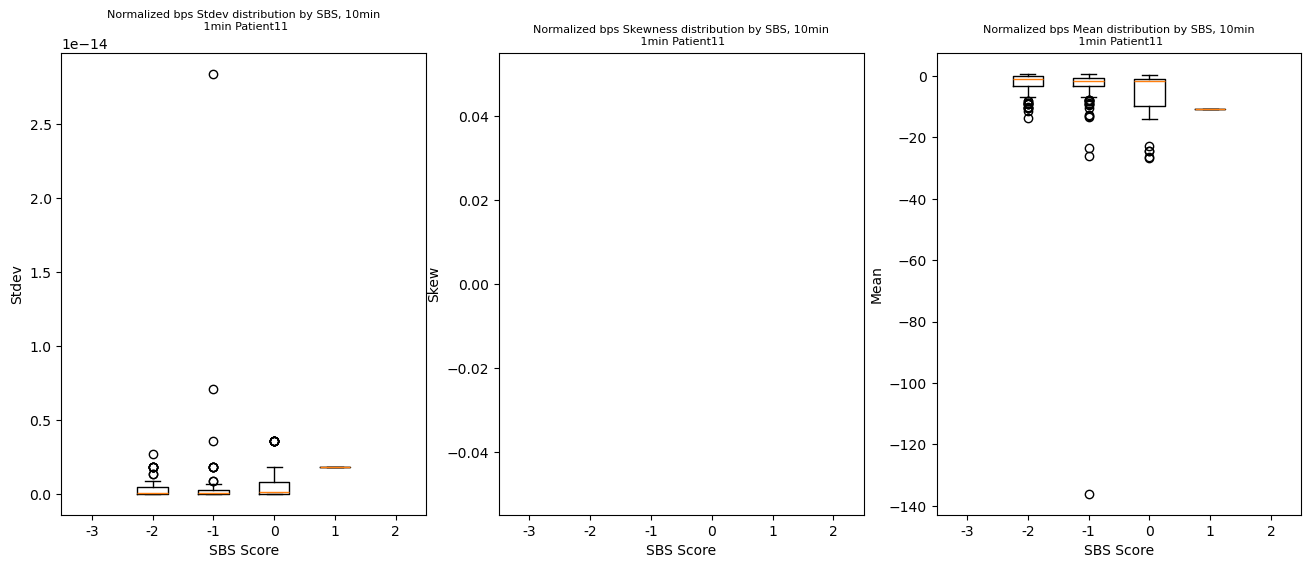

length of signal window for BoxPlot function: 303
T-test for mean values between SBS Score -2 and -1:
T-statistic: 1.2644901974583218
P-value: 0.20899160607007528
T-test for standard deviation values between SBS Score -2 and -1:
T-statistic: -1.09048889504987
P-value: 0.2780434970486388

T-test for mean values between SBS Score -2 and 0:
T-statistic: 4.077977278442997
P-value: 7.573715402415597e-05
T-test for standard deviation values between SBS Score -2 and 0:
T-statistic: -2.14074486858759
P-value: 0.033775908523856486

T-test for mean values between SBS Score -2 and 1:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score -2 and 1:
T-statistic: nan
P-value: nan

T-test for mean values between SBS Score -1 and 0:
T-statistic: 0.3749546871342337
P-value: 0.7083581481350458
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: 0.21375850385218673
P-value: 0.8311068138305461

T-test for mean values between SBS Score -1 and 1:
T-sta

/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stde

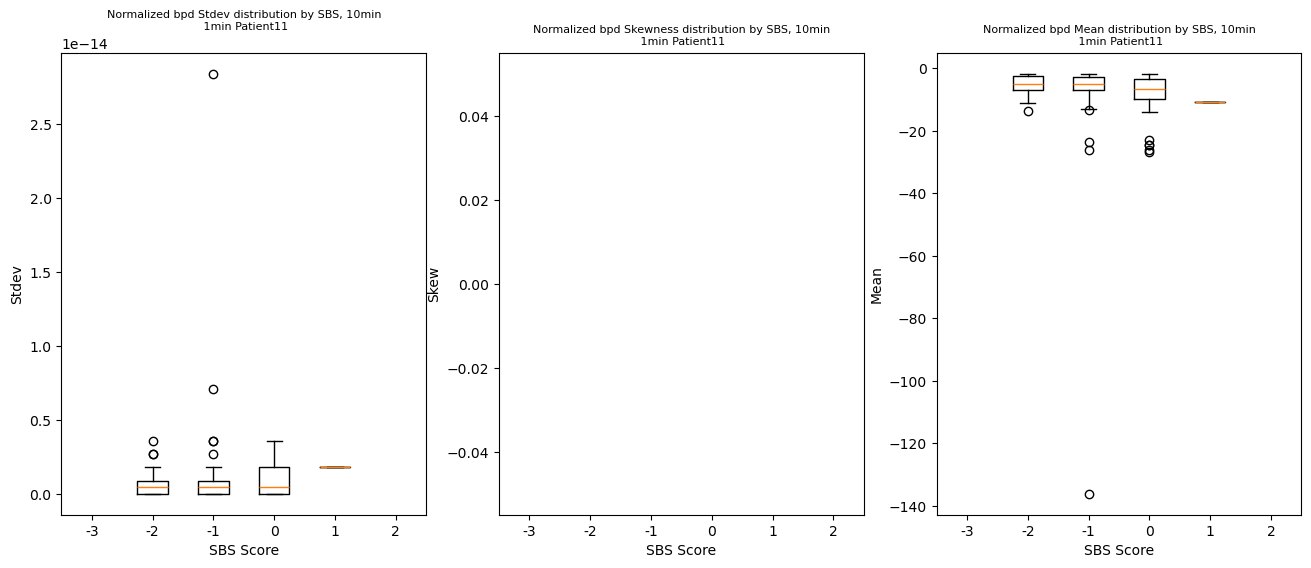

Processing patient: Patient14
Error processing patient Patient14: Timestamp('2024-02-09 23:35:00')
Processing patient: Patient4
T-test for MAD values between SBS Score -2 and -1:
T-statistic: 19.783293412544683
P-value: 3.557895877130832e-86

T-test for MAD values between SBS Score -2 and 0:
T-statistic: 22.414307668700953
P-value: 3.6474041070099525e-110

T-test for MAD values between SBS Score -2 and 1:
T-statistic: 5.838917514549255
P-value: 5.591345592119191e-09

T-test for MAD values between SBS Score -1 and 0:
T-statistic: -4.18699467327714
P-value: 2.8658424630163496e-05

T-test for MAD values between SBS Score -1 and 1:
T-statistic: -5.997751462793922
P-value: 2.1505759516875107e-09

T-test for MAD values between SBS Score 0 and 1:
T-statistic: -4.559482086922688
P-value: 5.30786216735818e-06



/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,0].boxplot([sbs_mad_dict[-3], sbs_mad_dict[-2], sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropp

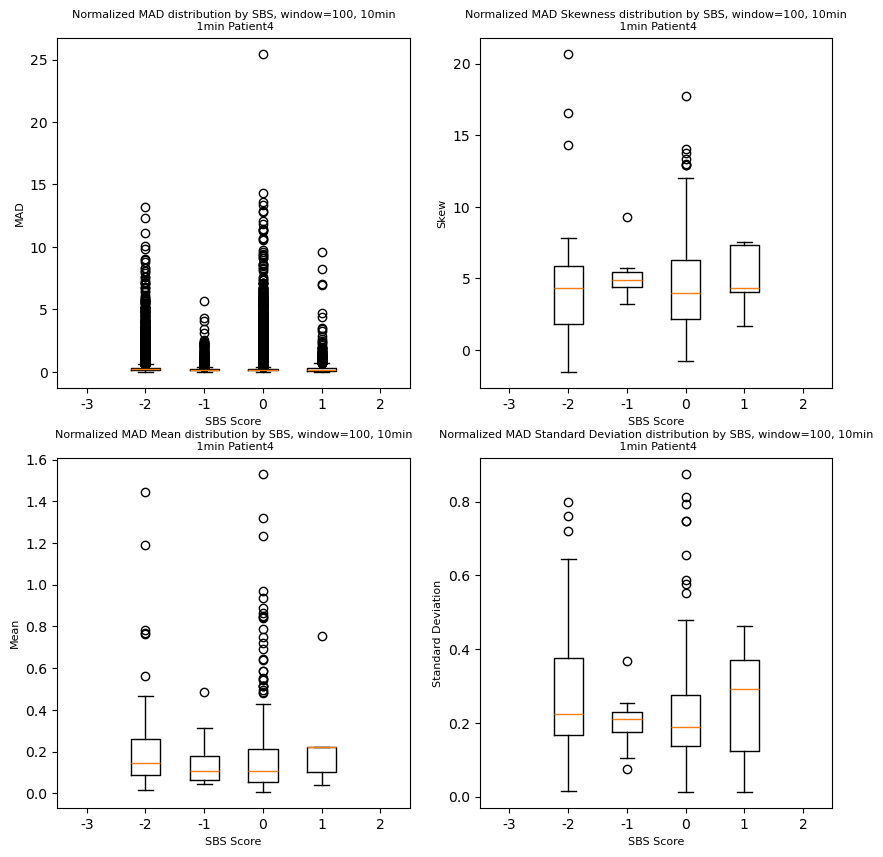

/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))


length of signal window for BoxPlot function: 255
T-test for mean values between SBS Score -2 and -1:
T-statistic: -0.1108623379690888
P-value: 0.9137789521902794
T-test for standard deviation values between SBS Score -2 and -1:
T-statistic: 0.6776617017711077
P-value: 0.5093783185034438

T-test for mean values between SBS Score -2 and 0:
T-statistic: -2.425641730192079
P-value: 0.02082292017468644
T-test for standard deviation values between SBS Score -2 and 0:
T-statistic: -1.3847962915186904
P-value: 0.1732828238359022

T-test for mean values between SBS Score -2 and 1:
T-statistic: -2.271921433109158
P-value: 0.034958924779848806
T-test for standard deviation values between SBS Score -2 and 1:
T-statistic: -3.5677440850420075
P-value: 0.013858476770724281

T-test for mean values between SBS Score -1 and 0:
T-statistic: -1.0934562967032604
P-value: 0.30972082421216907
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -1.718017101239422
P-value: 0.12371567

/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will 

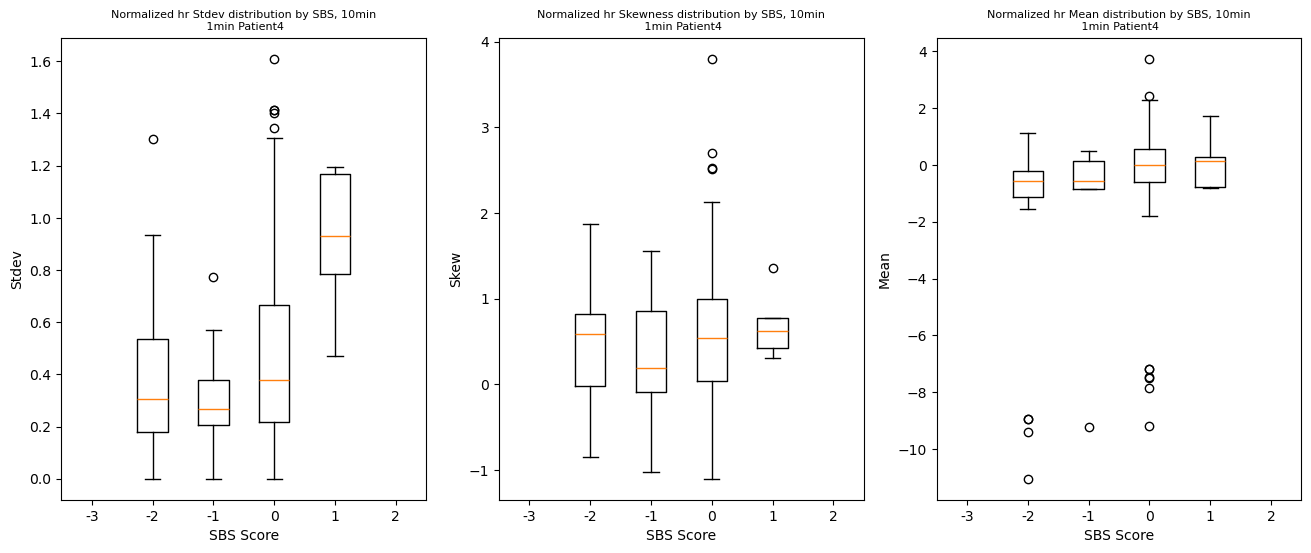

length of signal window for BoxPlot function: 255


/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stde

T-test for mean values between SBS Score -2 and -1:
T-statistic: 0.10088590735813437
P-value: 0.9217450774289302
T-test for standard deviation values between SBS Score -2 and -1:
T-statistic: -0.7709878469692398
P-value: 0.45763543189666533

T-test for mean values between SBS Score -2 and 0:
T-statistic: -2.0585508138078294
P-value: 0.0464618162631734
T-test for standard deviation values between SBS Score -2 and 0:
T-statistic: -2.3093043589407385
P-value: 0.026562603138739836

T-test for mean values between SBS Score -2 and 1:
T-statistic: -0.10221362894893579
P-value: 0.9226571075214136
T-test for standard deviation values between SBS Score -2 and 1:
T-statistic: -1.3374663093470498
P-value: 0.23980125654514448

T-test for mean values between SBS Score -1 and 0:
T-statistic: -0.9843702921232744
P-value: 0.3566347737444205
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -0.3131212568115635
P-value: 0.7629155227178434

T-test for mean values between SBS Sc

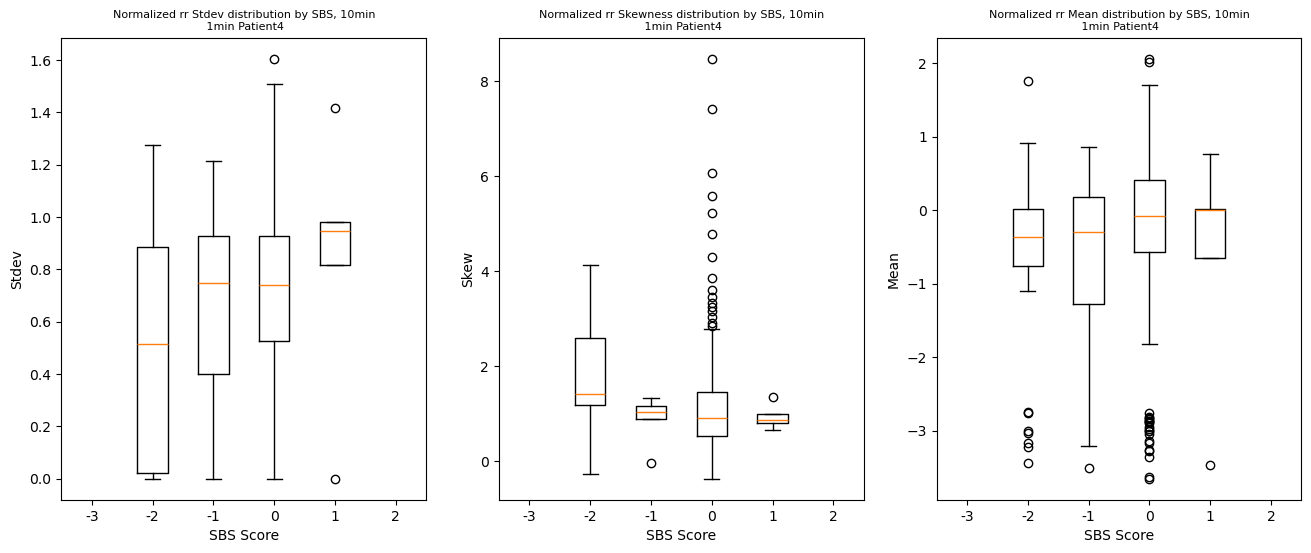

length of signal window for BoxPlot function: 255


/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stde

T-test for mean values between SBS Score -2 and -1:
T-statistic: 0.3188239841121783
P-value: 0.756322447975022
T-test for standard deviation values between SBS Score -2 and -1:
T-statistic: -0.08603694494097058
P-value: 0.9325912654284315

T-test for mean values between SBS Score -2 and 0:
T-statistic: -1.4887717215180827
P-value: 0.14533399924694118
T-test for standard deviation values between SBS Score -2 and 0:
T-statistic: -3.5241781548992543
P-value: 0.000947586265963838

T-test for mean values between SBS Score -2 and 1:
T-statistic: -0.35712174585932976
P-value: 0.7311524096332354
T-test for standard deviation values between SBS Score -2 and 1:
T-statistic: -1.9467499132316486
P-value: 0.10977524785156986

T-test for mean values between SBS Score -1 and 0:
T-statistic: -1.0500306269556312
P-value: 0.3275872350903967
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -2.508956718614431
P-value: 0.03391102210889587

T-test for mean values between SBS Sco

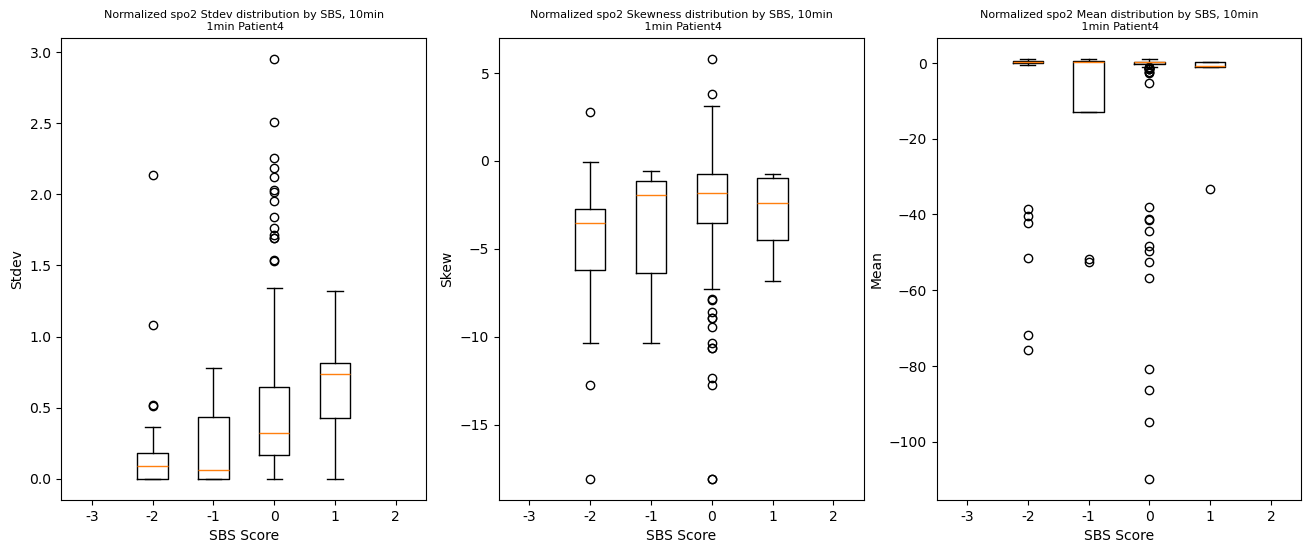

length of signal window for BoxPlot function: 255


/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stde

T-test for mean values between SBS Score -2 and -1:
T-statistic: 0.7041107540543402
P-value: 0.5030199519593684
T-test for standard deviation values between SBS Score -2 and -1:
T-statistic: 0.0
P-value: 1.0

T-test for mean values between SBS Score -2 and 0:
T-statistic: -1.718456099768334
P-value: 0.09261509261919146
T-test for standard deviation values between SBS Score -2 and 0:
T-statistic: -2.0942672828578375
P-value: 0.03744151557697993

T-test for mean values between SBS Score -2 and 1:
T-statistic: -1.463701178413459
P-value: 0.2020754594538068
T-test for standard deviation values between SBS Score -2 and 1:
T-statistic: 0.02409610346599258
P-value: 0.9817045380565583

T-test for mean values between SBS Score -1 and 0:
T-statistic: -1.0126815577638124
P-value: 0.3445888479360656
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -2.0942672828578375
P-value: 0.03744151557697993

T-test for mean values between SBS Score -1 and 1:
T-statistic: -1.283326

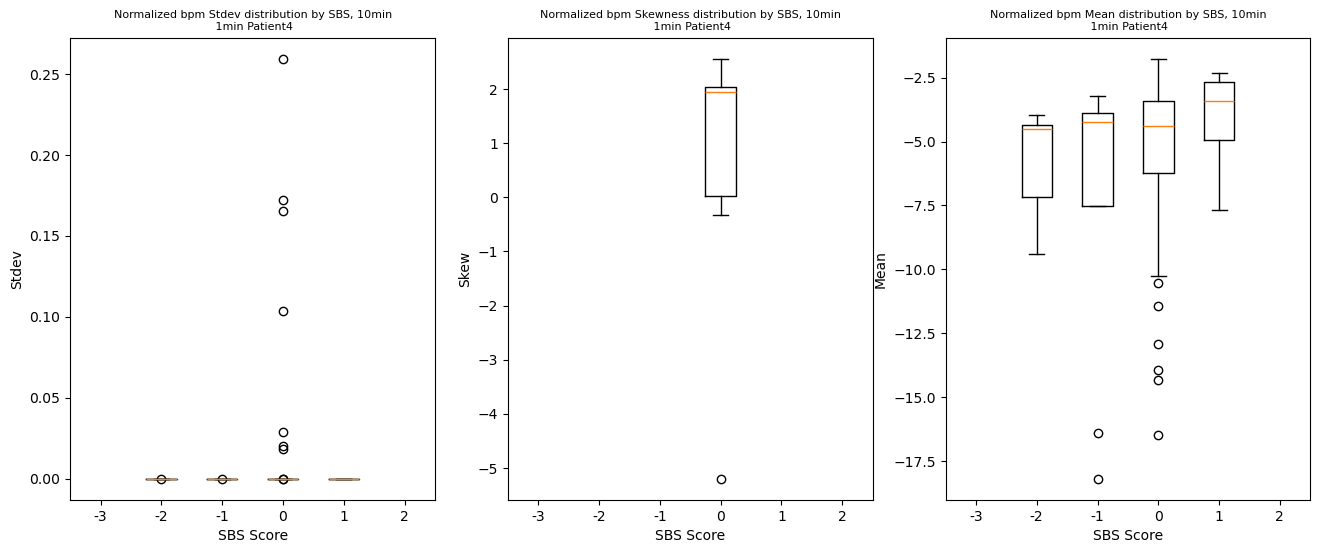

length of signal window for BoxPlot function: 255


/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stde

T-test for mean values between SBS Score -2 and -1:
T-statistic: 1.0533939016057552
P-value: 0.32595084314420636
T-test for standard deviation values between SBS Score -2 and -1:
T-statistic: -0.8702746676480919
P-value: 0.4103956259184305

T-test for mean values between SBS Score -2 and 0:
T-statistic: -1.6732509781843559
P-value: 0.101230462492832
T-test for standard deviation values between SBS Score -2 and 0:
T-statistic: -2.2248817429614816
P-value: 0.027158287261970674

T-test for mean values between SBS Score -2 and 1:
T-statistic: -2.1082853395008567
P-value: 0.07837464602641095
T-test for standard deviation values between SBS Score -2 and 1:
T-statistic: 0.6117434968493112
P-value: 0.5500703148450087

T-test for mean values between SBS Score -1 and 0:
T-statistic: -1.3103645156729844
P-value: 0.2311262563159187
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -2.224881742961418
P-value: 0.027158287261975

T-test for mean values between SBS Score -1

/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sbs_mean_dict[-3], sbs_mean_dict[-2], sbs_mean_dict[-1], sbs_mean_dict[0], sbs_mean_dict[1], sbs_mean_dict[2]],


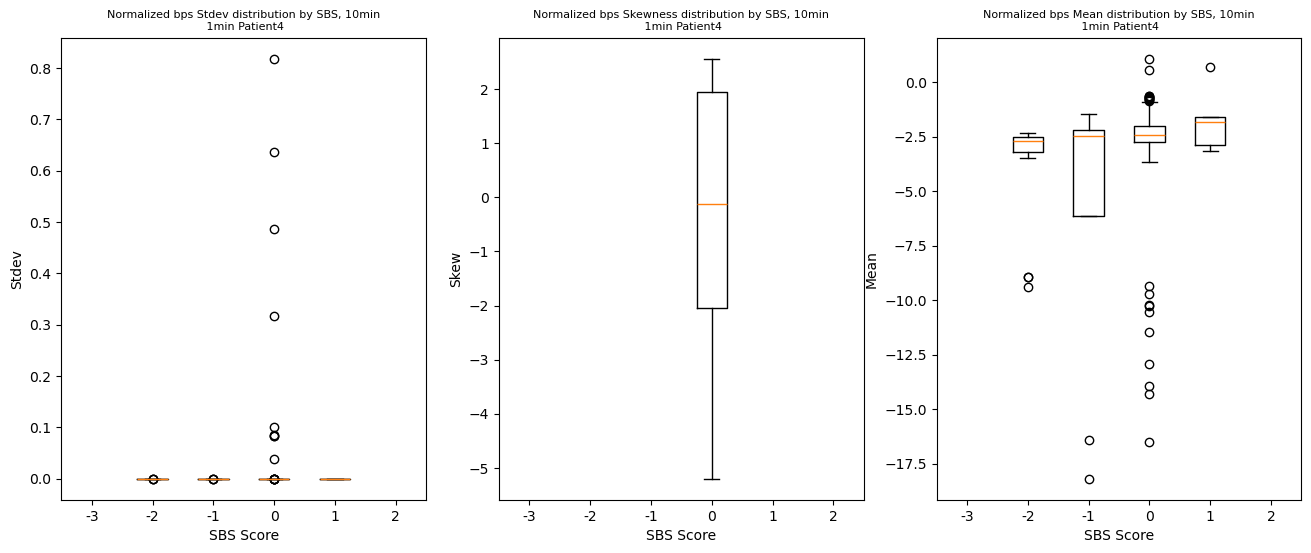

length of signal window for BoxPlot function: 255
T-test for mean values between SBS Score -2 and -1:
T-statistic: 1.0876468465989402
P-value: 0.31204702289534963
T-test for standard deviation values between SBS Score -2 and -1:
T-statistic: -1.513983725906543
P-value: 0.16896102969834287

T-test for mean values between SBS Score -2 and 0:
T-statistic: -3.376128183131451
P-value: 0.0013299295127888332
T-test for standard deviation values between SBS Score -2 and 0:
T-statistic: -2.358580027993432
P-value: 0.019267586516749372

T-test for mean values between SBS Score -2 and 1:
T-statistic: -2.375298048474804
P-value: 0.05801799207416175
T-test for standard deviation values between SBS Score -2 and 1:
T-statistic: 0.6209136636711733
P-value: 0.5562490498059065

T-test for mean values between SBS Score -1 and 0:
T-statistic: -1.4993932120911182
P-value: 0.1771203649017487
T-test for standard deviation values between SBS Score -1 and 0:
T-statistic: -2.3585800279932436
P-value: 0.01926758

/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:74: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sbs_skew_dict[sbs_value].append(skew(signal))
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
/var/folders/xx/h6f4q20x2x35wvhmf6w5p_xw0000gn/T/ipykernel_37618/3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stde

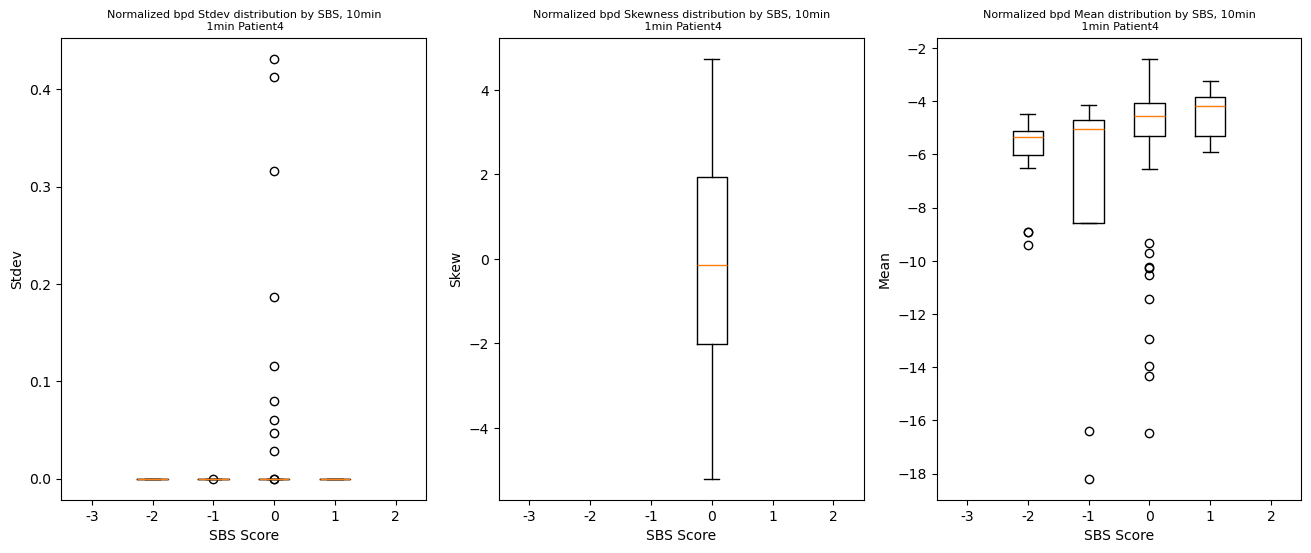

In [14]:
def calculate_pre_sbs_stats(patient_dir, patient):
    """
    Calculate statistics from 12-hour window before each SBS score
    """
    # Load raw vitals data
    vitals_file = os.path.join(patient_dir, f'{patient}_SickBayData.mat')
    vitals_data = loadmat(vitals_file)
    
    # Extract timestamps and convert to datetime
    time_data = vitals_data['time'][0].flatten()
    # Convert numpy array of strings to list of strings, handling the list format
    time_strings = []
    for item in time_data:
        if isinstance(item, np.ndarray):
            time_str = item.item()
        else:
            time_str = str(item)
        time_strings.append(time_str)
    
    # Convert to datetime with proper format
    timestamps = pd.to_datetime(time_strings, format='%m/%d/%Y %I:%M:%S %p')
    
    # Create DataFrames for each metric with actual timestamps
    hr_df = pd.Series(vitals_data['heart_rate'].flatten(), index=timestamps)
    spo2_df = pd.Series(vitals_data['SpO2'].flatten(), index=timestamps)
    rr_df = pd.Series(vitals_data['respiratory_rate'].flatten(), index=timestamps)
    
    # Load raw accelerometry data
    accel_file = os.path.join(patient_dir, f'{patient}_AccelData.gt3x')
    acti_data, acti_names = load_gt3x_data(accel_file)
    acti_data['mag'] = np.linalg.norm(acti_data[['X', 'Y', 'Z']].values, axis=1)
    acti_data['dts'] = pd.to_datetime(acti_data['Timestamp'], unit='s')
    accel_series = acti_data.set_index('dts')['mag']
    
    # Load SBS data to get timestamps
    data_filepath = os.path.join(patient_dir, f'{patient}_SICKBAY_{lead_time}MIN_{slice_size_min - lead_time}MIN_Retro.mat')
    sbs_data = loadmat(data_filepath)
    
    # Convert start times to datetime with proper format
    sbs_times = []
    for ts in sbs_data['start_time'].flatten():
        if isinstance(ts, np.ndarray):
            time_str = ts.item()
        else:
            time_str = str(ts)
        sbs_times.append(time_str)
    
    sbs_times = pd.to_datetime(sbs_times, format='%Y-%m-%dT%H:%M:%S')
    
    # Calculate statistics for 12 hours before each SBS score
    window_stats = []
    for sbs_time in sbs_times:
        # Define 12-hour window before SBS score
        window_start = sbs_time - pd.Timedelta(hours=12)
        
        # Get data in this window
        hr_window = hr_df[window_start:sbs_time]
        spo2_window = spo2_df[window_start:sbs_time]
        rr_window = rr_df[window_start:sbs_time]
        accel_window = accel_series[window_start:sbs_time]
        
        # Calculate statistics
        stats = {
            'heart_rate': {'mean': hr_window.mean(), 'std': hr_window.std()},
            'SpO2': {'mean': spo2_window.mean(), 'std': spo2_window.std()},
            'respiratory_rate': {'mean': rr_window.mean(), 'std': rr_window.std()},
            'accelerometry': {'mean': accel_window.mean(), 'std': accel_window.std()}
        }
        window_stats.append(stats)
    
    return window_stats

def normalize_sbs_data(patient_dir, patient, window_stats):
    """
    Normalize the SBS data using the pre-calculated window statistics
    """
    # Load the SBS data
    data_filepath = os.path.join(patient_dir, f'{patient}_SICKBAY_{lead_time}MIN_{slice_size_min - lead_time}MIN_Retro.mat')
    data = loadmat(data_filepath)
    
    # Extract data
    x_mag = data["x_mag"]
    SBS = data["sbs"].flatten()
    hr = data['heart_rate']
    SpO2 = data['SpO2']
    rr = data['respiratory_rate']
    bps = data['blood_pressure_systolic']
    bpm = data['blood_pressure_mean']
    bpd = data['blood_pressure_diastolic']
    
    # Normalize each window using its corresponding pre-SBS statistics
    normalized_data = {
        'heart_rate': [],
        'SpO2': [],
        'respiratory_rate': [],
        'accelerometry': [],
        'blood_pressure_systolic': [],
        'blood_pressure_mean': [],
        'blood_pressure_diastolic': []
    }
    
    for i in range(len(window_stats)):
        stats = window_stats[i]
        
        # Normalize the data
        normalized_data['heart_rate'].append((hr[i] - stats['heart_rate']['mean']) / stats['heart_rate']['std'])
        normalized_data['SpO2'].append((SpO2[i] - stats['SpO2']['mean']) / stats['SpO2']['std'])
        normalized_data['respiratory_rate'].append((rr[i] - stats['respiratory_rate']['mean']) / stats['respiratory_rate']['std'])
        normalized_data['accelerometry'].append((x_mag[i] - stats['accelerometry']['mean']) / stats['accelerometry']['std'])
        normalized_data['blood_pressure_systolic'].append((bps[i] - stats['heart_rate']['mean']) / stats['heart_rate']['std'])  # Using HR stats as proxy
        normalized_data['blood_pressure_mean'].append((bpm[i] - stats['heart_rate']['mean']) / stats['heart_rate']['std'])  # Using HR stats as proxy
        normalized_data['blood_pressure_diastolic'].append((bpd[i] - stats['heart_rate']['mean']) / stats['heart_rate']['std'])  # Using HR stats as proxy
    
    return normalized_data, SBS

# Main processing loop
for patient in os.listdir(data_dir):
    patient_dir = os.path.join(data_dir, patient)
    if os.path.isdir(patient_dir):
        print(f"Processing patient: {patient}")
        
        try:
            # Calculate statistics from 12 hours before each SBS score
            window_stats = calculate_pre_sbs_stats(patient_dir, patient)
            
            # Normalize the SBS data using these statistics
            normalized_data, SBS = normalize_sbs_data(patient_dir, patient, window_stats)
            
            # Convert normalized data to numpy arrays for boxplot functions
            x_mag_norm = np.array(normalized_data['accelerometry'])
            hr_norm = np.array(normalized_data['heart_rate'])
            spo2_norm = np.array(normalized_data['SpO2'])
            rr_norm = np.array(normalized_data['respiratory_rate'])
            bps_norm = np.array(normalized_data['blood_pressure_systolic'])
            bpm_norm = np.array(normalized_data['blood_pressure_mean'])
            bpd_norm = np.array(normalized_data['blood_pressure_diastolic'])
            
            # Create lists for vitals data
            vitals_list = [hr_norm, rr_norm, spo2_norm, bpm_norm, bps_norm, bpd_norm]
            vitals_names = ['hr', 'rr', 'spo2', 'bpm', 'bps', 'bpd']
            
            # ACTIGRAPH BOX PLOTS
            ax1, sbs_mad_dict, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict = MAD_boxplot(SBS, x_mag_norm, window_size, show_outlier=True)
            ax1[0,0].set_title(f'Normalized MAD distribution by SBS, window=100, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize=8)
            ax1[0,1].set_title(f'Normalized MAD Skewness distribution by SBS, window=100, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize=8)
            ax1[1,0].set_title(f'Normalized MAD Mean distribution by SBS, window=100, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize=8)
            ax1[1,1].set_title(f'Normalized MAD Standard Deviation distribution by SBS, window=100, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize=8)
            plt.show()
            
            # VITALS BOX PLOTS
            for k in range(len(vitals_list)):
                signal = np.array(vitals_list[k])
                print(f'length of signal window for BoxPlot function: {len(signal)}')
                ax2, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict = vitals_boxplot(SBS, signal, window_size, show_outlier=True)
                ax2[0].set_title(f'Normalized {vitals_names[k]} Stdev distribution by SBS, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize=8)
                ax2[1].set_title(f'Normalized {vitals_names[k]} Skewness distribution by SBS, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize=8)
                ax2[2].set_title(f'Normalized {vitals_names[k]} Mean distribution by SBS, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize=8)
                plt.show()
            
        except Exception as e:
            print(f"Error processing patient {patient}: {str(e)}")

In [ ]:

# There is no error handling in place, the .mat file must exist
for patient in os.listdir(data_dir):
    # filter out non-directories
    patient_dir = os.path.join(data_dir, patient)
    if os.path.isdir(patient_dir):
        # data_filepath_accel = os.path.join(patient_dir, f'{patient}_{lead_time}MIN_{slice_size_min - lead_time}MIN_Validated.mat')           
        data_filepath = os.path.join(patient_dir, f'{patient}_SICKBAY_{lead_time}MIN_{slice_size_min - lead_time}MIN_Retro.mat')
        
        data = loadmat(data_filepath)
        x_mag = data["x_mag"]
        SBS = data["sbs"].flatten()
        
        hr = data['heart_rate']
        SpO2 = data['SpO2']
        rr = data['respiratory_rate']
        bps = data['blood_pressure_systolic']
        bpm = data['blood_pressure_mean']
        bpd = data['blood_pressure_diastolic']
        vitals_list = [hr,rr,SpO2,bpm,bps,bpd]
        vitals_names = ['hr','rr','spo2','bpm','bps','bpd']
        
        #Call Functions for Analysis for each patient here!

        # ACTIGRAPH BOX PLOTS
        ax1, sbs_mad_dict, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict = MAD_boxplot(SBS, x_mag, window_size, show_outlier=True)
        ax1[0,0].set_title(f'MAD distribution by SBS, window=100, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
        ax1[0,1].set_title(f'MAD Skewness distribution by SBS, window=100, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
        ax1[1,0].set_title(f'MAD Mean distribution by SBS, window=100, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
        ax1[1,1].set_title(f'MAD Standard Deviation distribution by SBS, window=100, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
        plt.show()

        #VITALS BOX PLOTS
        index = 0
        for k in  range(len(vitals_list)): 
            signal = (np.array(vitals_list[k])) 
            print(f'length of signal window for BoxPlot function: {len(signal[0])}') #should be the number of samples in a window
            ax2, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict = vitals_boxplot(SBS, signal, window_size, show_outlier=True) #boxplot function iterates through 2D array
            ax2[0].set_title(f'{vitals_names[index]} Stdev distribution by SBS, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
            ax2[1].set_title(f'{vitals_names[index]} Skewness distribution by SBS, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
            ax2[2].set_title(f'{vitals_names[index]} Mean distribution by SBS, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
            index+=1
            plt.show()